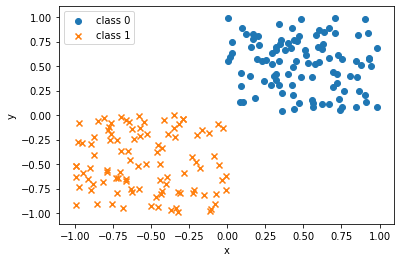

In [2]:
#サポートベクタマシン
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(size=(100, 2))

y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1.0, 0.0, size=(100,2))

y1 = np.repeat(1, 100)

fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:,1], marker='o', label='class 0')
ax.scatter(X1[:, 0], X1[:,1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [9]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):

    svc = SVC(kernel=kernel, C=C)
    
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker='o', label='class 0')
    ax.scatter(X1[:, 0], X1[:, 1], marker='x', label='class 1')
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    ax.scatter(svc.support_vectors_[:,0],
              svc.support_vectors_[:,1],
              s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

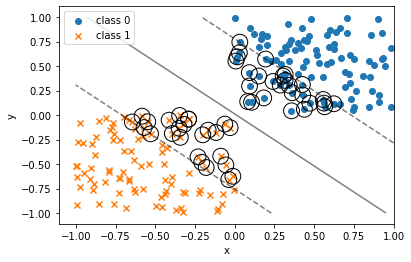

In [10]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)